In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from IPython.display import HTML, display, Markdown, Latex
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#Configuraçôes 

warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
plt.style.use("seaborn-darkgrid")

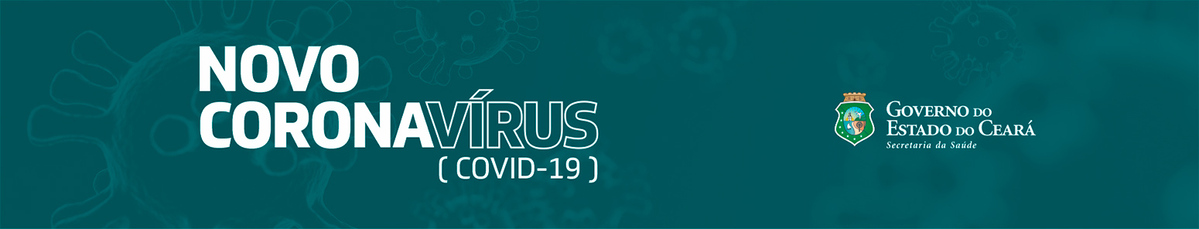

In [2]:
from PIL import Image
Image.open('./img/top_novo_coronavirus.jpg')

# Clique no botão a baixo para mostar o codigo

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mostar o código."></form>''')

    1. Aquisição de dados
    1.1 Obter dados
    1.2 Descompactar 
    1.3 Listar arquivos 
    1.4 Carregar os dados

In [4]:
import requests

url = 'http://download-integrasus.saude.ce.gov.br/casos_covid19'
downloads_path = 'downloads/'
datasets_path = 'datasets/'
file_name = 'casos_covid19.zip'

resposta = requests.get(url)

with open(downloads_path+file_name, 'wb') as novo_arquivo:
    novo_arquivo.write(resposta.content)


In [5]:
from zipfile import ZipFile

z = ZipFile(downloads_path+file_name, 'r')
z.extractall(datasets_path)
z.close()

In [6]:
import os

files = os.listdir(datasets_path)
files

['casos_coronavirus_2020_11_26.csv',
 'casos_coronavirus_2020_12_05.csv',
 'casos_coronavirus_localidade_2020_11_26.csv',
 'casos_coronavirus_localidade_2020_12_05.csv']

In [7]:
#for i,file in zip(range(len(files)), files):
    #print(f'indice: {i} nome: {file}')

#import pandas as pd 
#for i,file in zip(range(len(files)), files):
    #df_i = pd.read_csv(datasets_path+file, sep=';')

In [8]:
import pandas as pd

df = pd.read_csv(datasets_path+files[1], sep=';')

    2 Analizar o dataset
    2.1 anaizar o tamanho da base
    2.2 analizar os tipos das colunas
    2.3 definir quais colunas seram utilizadas
    2.4 analizar e altear os tipos dos dados
    2.5 analise descritiva

In [9]:
df.shape

(1366974, 62)

In [10]:
df.head()
#df_casos.tail()
#df.describe() # usar isso em casos por municipio.
#df_casos.columns
#df_casos.dtypes

,identificadorCaso,idRedcap,idEsus,idSivep,classificacaoEstadoRedcap,classificacaoEstadoEsus,classificacaoFinalEsus,evolucaoCasoEsus,cboEsus,profissionalSaudeEsus,...,municipioNotificacaoEsus,tipoObitoMaterno,classificacaoFinalCasoSivep,gestante,tipoTesteEsus,obitoConfirmado,dataObito,classificacaoObito,localObito,tipoLocalObito
0,eb8083e2b1973a827ecb45ba659ed34d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,815d552c63cb3d6cf489598695e8dd5c,NaN,2.32006e+11,NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,815d552c63cb3d6cf489598695e8dd5c,NaN,2.32006e+11,NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1fe17a85d045176fc85b045cc89237a5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27348b8cb9d114edf420feb3034d921b,NaN,2.32019e+11,NaN,NaN,Negativo,NaN,NaN,NaN,False,...,CRATO,NaN,NaN,NaN,TESTE RÁPIDO - ANTICORPO,NaN,NaN,NaN,NaN,NaN


In [11]:
df.columns.tolist()

['identificadorCaso',
 'idRedcap',
 'idEsus',
 'idSivep',
 'classificacaoEstadoRedcap',
 'classificacaoEstadoEsus',
 'classificacaoFinalEsus',
 'evolucaoCasoEsus',
 'cboEsus',
 'profissionalSaudeEsus',
 'paisCaso',
 'estadoCaso',
 'codigoMunicipioCaso',
 'municipioCaso',
 'bairroCaso',
 'bairroCasoGeocoder',
 'sexoCaso',
 'idadeCaso',
 'faixaEtaria',
 'dataNascimento',
 'dataNotificacao',
 'dataInicioSintomas',
 'dataSolicitacaoExame',
 'dataColetaExame',
 'dataResultadoExame',
 'resultadoFinalExame',
 'laboratorioExame',
 'classificacaoEstadoSivep',
 'dataInternacaoSivep',
 'dataEntradaUTISivep',
 'dataSaidaUTISivep',
 'evolucaoCasoSivep',
 'dataEvolucaoCasoSivep',
 'comorbidadePuerperaSivep',
 'comorbidadeCardiovascularSivep',
 'comorbidadeHematologiaSivep',
 'comorbidadeSindromeDownSivep',
 'comorbidadeHepaticaSivep',
 'comorbidadeAsmaSivep',
 'comorbidadeDiabetesSivep',
 'comorbidadeNeurologiaSivep',
 'comorbidadePneumopatiaSivep',
 'comorbidadeImunodeficienciaSivep',
 'comorbidade

Transformando o tipo dos campos de Data

In [12]:
datas = ['dataNascimento',
 'dataNotificacao',
 'dataInicioSintomas',
 'dataSolicitacaoExame',
 'dataColetaExame',
 'dataResultadoExame',
 'dataInternacaoSivep',
 'dataEntradaUTISivep',
 'dataSaidaUTISivep',
 'dataEvolucaoCasoSivep',
 'dataNotificacaoObito',
 'dataObito']
         
for data in datas:
  df[data] = df[data].astype('datetime64', errors = 'ignore')

### Curva Epidemiológica

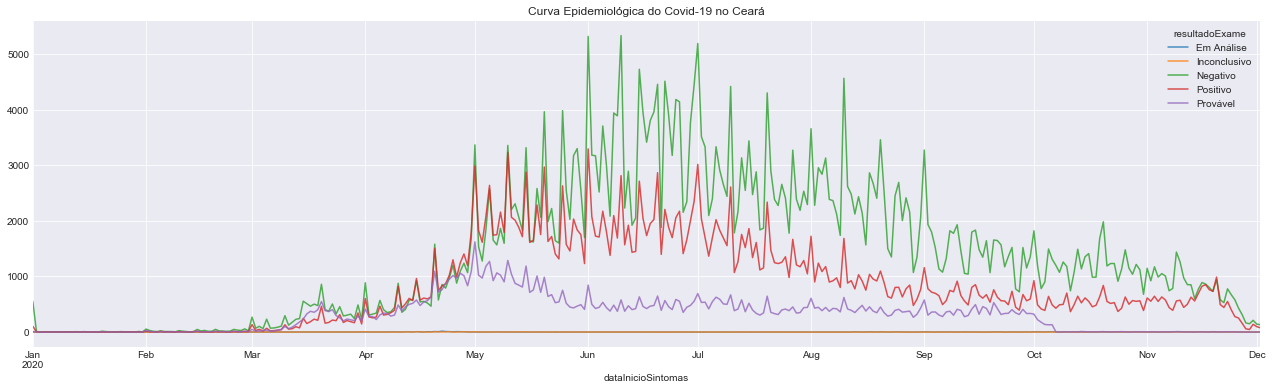

In [13]:
ts = df[['dataInicioSintomas','identificadorCaso','resultadoFinalExame']].groupby(['dataInicioSintomas', 'resultadoFinalExame']).agg('count')

df_resultados = ts[:-4:].reset_index()
df_resultados.columns =  ['dataInicioSintomas', 'resultadoExame', 'Casos']
df_resultados.set_index('dataInicioSintomas', inplace = True)

df_resultados = df_resultados.pivot(columns='resultadoExame',values="Casos").fillna(0)

ax = df_resultados.plot(alpha=0.8,figsize=(22,6), title='Curva Epidemiológica do Covid-19 no Ceará')

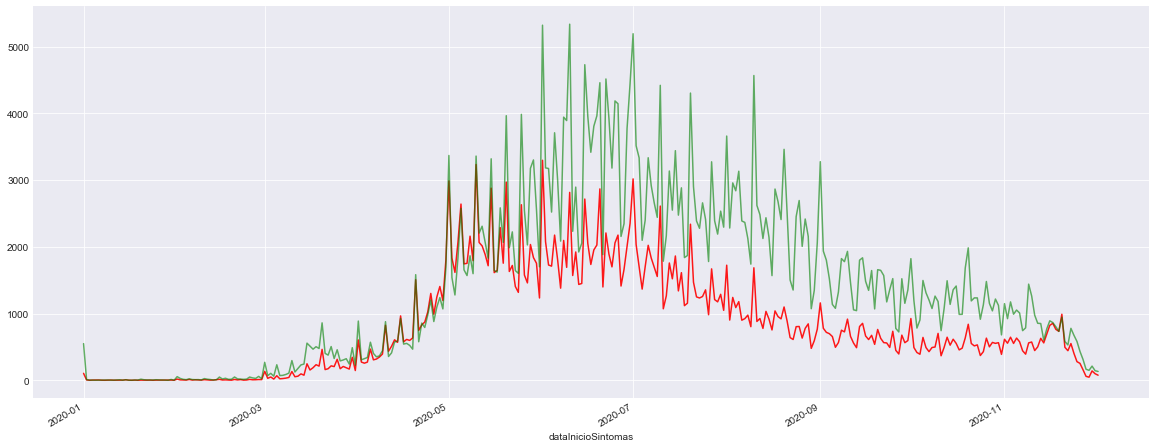

In [14]:
plt.figure(figsize=(20,8))


with pd.plotting.plot_params.use('x_compat', True):
    df_resultados['Positivo'].plot(color='r', alpha=0.9)
    df_resultados['Negativo'].plot(color='g', alpha=0.6)


## Casos confirmados

In [15]:
df_positovos = df[(df["resultadoFinalExame"] == 'Positivo')&
                              (df["estadoCaso"] == 'CE')]

In [16]:
len(df_positovos['identificadorCaso'].unique())

300268

In [17]:
df_positovos.shape

(378921, 62)

Text(0, 0.5, 'Casos confirmados')

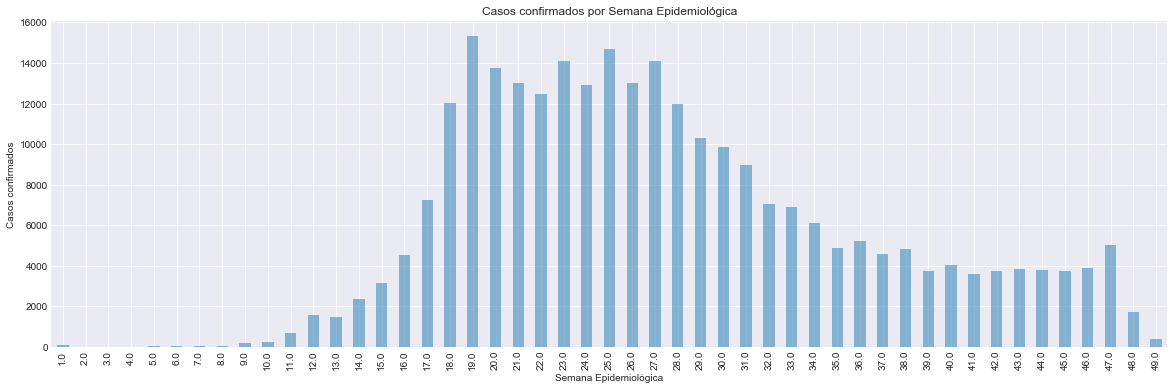

In [18]:
ts_positovos = df_positovos.groupby(df_positovos['dataInicioSintomas'].dt.week).dataInicioSintomas.count()
ax = ts_positovos.plot(kind='bar',alpha=0.5,figsize=(20,6), title='Casos confirmados por Semana Epidemiológica')
ax.set_xlabel('Semana Epidemiológica')
ax.set_ylabel('Casos confirmados')

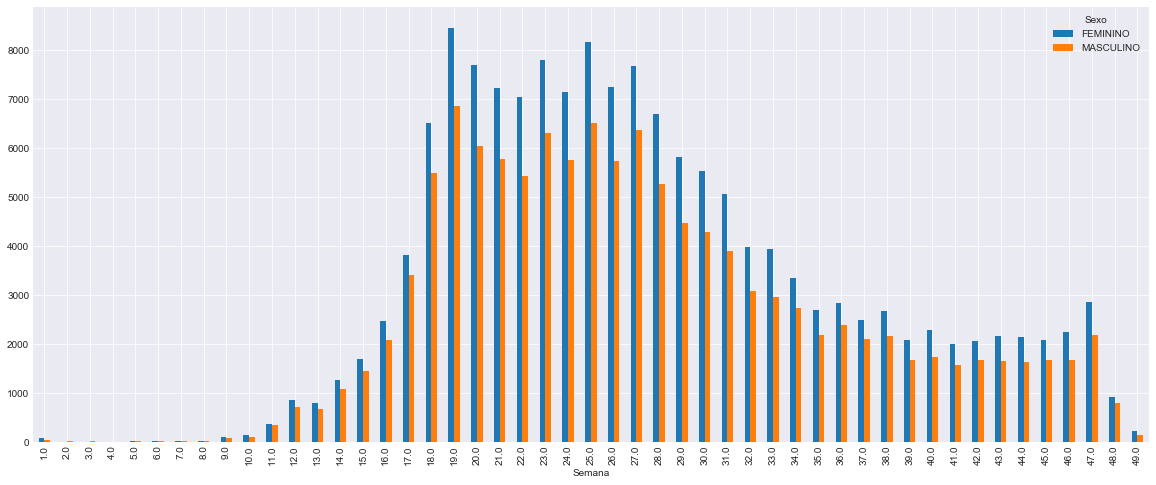

In [19]:
df_caso_sexo = df_positovos[['dataInicioSintomas','sexoCaso']].groupby([
    df_positovos['dataInicioSintomas'].dt.week, 'sexoCaso']).agg('count').rename(columns={'dataInicioSintomas': 'Casos'})

df_caso_sexo = df_caso_sexo.reset_index()

df_caso_sexo.columns = ['Semana', 'Sexo', 'Casos']

df_caso_sexo = df_caso_sexo.pivot(index='Semana',columns='Sexo',values="Casos")

df_caso_sexo.plot(kind='bar', figsize=(20,8))

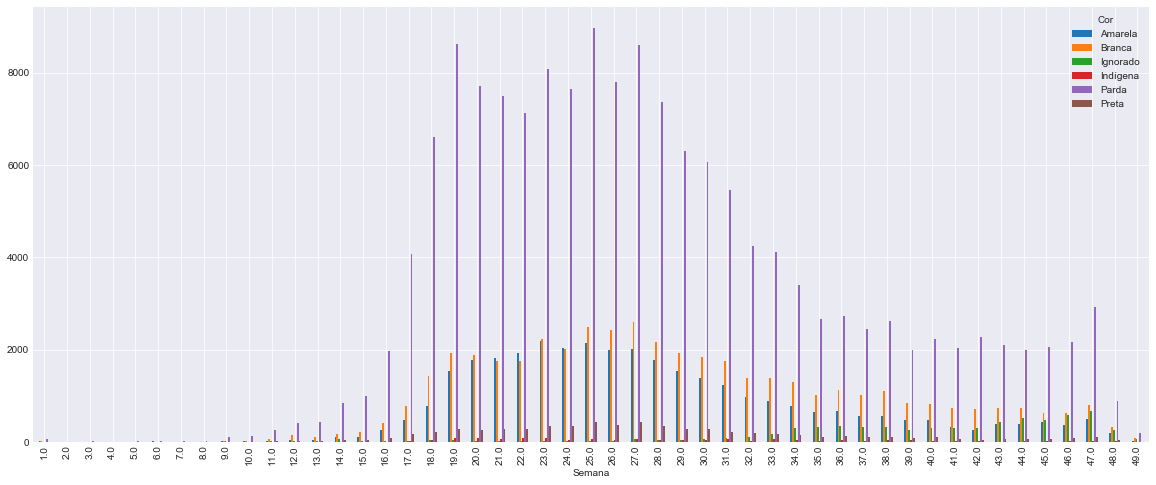

In [20]:
df_caso_cor = df_positovos[['dataInicioSintomas','racaCor']].groupby([
    df_positovos['dataInicioSintomas'].dt.week, 'racaCor']).agg('count').rename(columns={'dataInicioSintomas': 'Casos'})

df_caso_cor = df_caso_cor.reset_index()

df_caso_cor.columns = ['Semana', 'Cor', 'Casos']

df_caso_cor = df_caso_cor.pivot(index='Semana',columns='Cor',values="Casos")

df_caso_cor.plot(kind='bar', figsize=(20,8))

In [21]:
df_caso_cor = df_caso_cor.fillna(0)

In [22]:
df_caso_cor

Cor,Amarela,Branca,Ignorado,Indígena,Parda,Preta
Semana,,,,,,
1.0,22.0,23.0,3.0,0.0,60.0,3.0
2.0,4.0,2.0,0.0,0.0,3.0,1.0
3.0,1.0,3.0,1.0,0.0,7.0,0.0
4.0,0.0,0.0,0.0,0.0,5.0,1.0
5.0,5.0,5.0,1.0,0.0,17.0,0.0
6.0,8.0,5.0,1.0,0.0,19.0,1.0
7.0,4.0,5.0,0.0,0.0,22.0,0.0
8.0,6.0,2.0,2.0,0.0,19.0,0.0
9.0,16.0,15.0,17.0,0.0,101.0,1.0


In [23]:
Amarela Branca Ignorado Indígena Parda Preta

SyntaxError: invalid syntax (<ipython-input-23-d3bdc6e0d7cb>, line 1)

In [ ]:
plt.figure(figsize=(20,8))


with pd.plotting.plot_params.use('x_compat', True):
    df_caso_cor['Amarela'].plot(color='y', alpha=0.9)
    df_caso_cor['Branca'].plot(kind='bar',color='wheat', alpha=0.6)
    df_caso_cor['Indígena'].plot(color='c', alpha=0.6)
    df_caso_cor['Preta'].plot(kind='bar',color='brown', alpha=0.6)


### Curva de obitos

In [ ]:
df['obitoConfirmado'].unique()

In [ ]:
df_obito = df.dropna(subset=["obitoConfirmado"], axis=0)

In [ ]:
df_obito['obitoConfirmado'].unique()

In [ ]:
df_obito.shape

In [ ]:
df_obito_classificacao = df_obito[['obitoConfirmado', 'classificacaoObito','identificadorCaso']].groupby(['obitoConfirmado', 'classificacaoObito']).agg('count')
df_obito_classificacao

In [ ]:
df_obito_confirmado = df_obito_classificacao.loc[True]

In [ ]:
ts = df_obito[['dataObito','obitoConfirmado','classificacaoObito']].groupby(['dataObito', 'classificacaoObito']).agg('count')
df_obito_ts = ts.reset_index()

In [ ]:
df_obito_ts.head()

In [ ]:
df_obito_ts_pivot = df_obito_ts.pivot(index='dataObito',columns='classificacaoObito',values='obitoConfirmado')

In [ ]:
df_obito_ts_pivot= df_obito_ts_pivot.fillna(0)

In [ ]:
df_obito_ts_pivot.head()

fazer barra empilhada

In [ ]:
df_obito_ts_pivot.plot(figsize=(20,8))

In [ ]:
df_obito_confirmado = df_obito[df_obito['obitoConfirmado'] == True]

df_obito_confirmado_ts = df_obito_confirmado[['dataObito','identificadorCaso']].groupby(['dataObito']).agg('count').rename(columns={'identificadorCaso': 'Casos'})

df_obito_confirmado_ts.plot(figsize=(20,8))

In [ ]:
df_obito_confirmado_mes = df_obito_confirmado[['dataObito']].groupby(df_obito_confirmado['dataObito'].dt.month).agg('count').rename(columns={'dataObito': 'Casos'})
#inserir o nome do index
df_obito_confirmado_mes #.plot(figsize=(20,8))

### Obitos covid-19 por Semana Epidemiológica

In [ ]:
df_obito_confirmado_semana = df_obito_confirmado[['dataObito']].groupby(
    df_obito_confirmado['dataObito'].dt.week).agg('count')

ax = df_obito_confirmado_semana.plot(kind='bar', figsize=(20,8), title='Obitos covid-19 por Semana Epidemiológica')
ax.set_xlabel('Semana Epidemiológica')
ax.set_ylabel('Obitos covid-19')
ax.plot()

### Casos e Obitos

In [ ]:
result = df_obito_confirmado_ts.join(df_resultados['Positivo'], how='outer')
result.columns = ['Obitos', 'Casos Positivos']
result.plot.area(figsize=(20,8), alpha=0.7)

# Obrigado!